# Exploratory Data Analysis of Disney Movies 

## Alexandria Ransom

### Dataset available at : *https://www.kaggle.com/prateekmaj21/disney-movies*

#### Medium Article Explanation: *CodingwithAlexandria*
*Project Purpose: The focus is to explore the data to get a better understanding of what data is trying to speak forth. (Additional Questions will be located further in project)Some of these Questions around that focus consist of: What movies did well in inflation adjusted gross income? What genres of movies had the lowest income? What are some of top movies(per this dataset) that acquired the most income in both income columns that Disney has ever produced in history?*

#### *Please refer to the Medium Article first to follow along so you understand the questions for the data prior and for a more visual understanding overall on what is completed below.*

### Import Required Modules

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

### Read Data 

In [24]:
disney_movies = pd.read_csv("C:\\Users\\Alexandria\\Downloads\\disney\\disney_movies.csv")

In [25]:
disney_movies.head(10) #View and inspect the first 10 rows

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,12/21/1937,Musical,G,184925485,5228953251
1,Pinocchio,2/9/1940,Adventure,G,84300000,2188229052
2,Fantasia,11/13/1940,Musical,G,83320000,2187090808
3,Song of the South,11/12/1946,Adventure,G,65000000,1078510579
4,Cinderella,2/15/1950,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",12/23/1954,Adventure,NaN,28200000,528279994
6,Lady and the Tramp,6/22/1955,Drama,G,93600000,1236035515
7,Sleeping Beauty,1/29/1959,Drama,NaN,9464608,21505832
8,101 Dalmatians,1/25/1961,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,3/16/1961,Comedy,NaN,25381407,310094574


### Notes and Observations:

#### First, let's take a look at every column name. These are called attributes. They describe the data and the whole column and rows can be put into  containers(list, tuples, dictionaries,sets,etc) . Now, let's make a note of each column name so we can see what we will be working with. Next, under each column name starting with "movie title", look at the data type for that column. I enjoy making a visual note of this below and assign each data type to the correct column so I can visually see a written description in what I'm working with.

#### Each Column Name and Data Type: (Helps keep you organized!)


### 1.)  *movie title: string*
### 2.) *release_date : string/date* 
### 3.) *genre: string*
### 4.) *mpaa_rating: string*
### 5.) *total_gross: int*
### 6.)  *inflation_adjusted_gross: int*



*Proceeding to explore the bottom of this dataset to look at this data's overall shape and to get a sense of the data itself.*

In [26]:
disney_movies.tail()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
574,The Light Between Oceans,9/2/2016,Drama,PG-13,12545979,12545979
575,Queen of Katwe,9/23/2016,Drama,PG,8874389,8874389
576,Doctor Strange,11/4/2016,Adventure,PG-13,232532923,232532923
577,Moana,11/23/2016,Adventure,PG,246082029,246082029
578,Rogue One: A Star Wars Story,12/16/2016,Adventure,PG-13,529483936,529483936


In [27]:
disney_movies.shape     #How many columns and rows does this dataset have?

(579, 6)

We see a total there is 579 rows

In [28]:
type(disney_movies)

pandas.core.frame.DataFrame

### Talking to the Dataset in Statistics 
We will see the 2 numerical columns *total_Gross* and *inflation_adjusted_gross* summarized broken down in a summary mini table of statistical metrics for you to easily understand.

In [29]:
disney_movies.describe() 

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


### *Exploring the data in Statistics: Our 2 numerical columns from above we saw are now summarized into statistical insights. The central limit theorm has been applied to both columns. Next, we will draw a boxplot of these insights included.*

<AxesSubplot:>

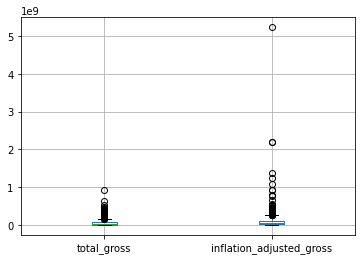

In [31]:
disney_movies.boxplot()

*In the boxplot, for the "total_gross" and the "inflation_adjusted_gross", we see a direct match to of where the data is concentrated at from the summary stats from our disney_movies.describe() method. The clear and black dots represents each movie. For example, for total_gross we see above in this photo, the max value: is the clear dot closet to the number 1 on the y axis (\\$1B) on the chart above which represents the point \\$936,662,225. It can be looked at as somewhat of a data point similar to an outlier because we can see most of our data is concentrated underneath that threshold. I ran a quick filter to see what this exact movie title (clear dot point) that is right before the number 1 in our picture*

In [32]:
disney_movies[disney_movies.total_gross>900000000]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,12/18/2015,Adventure,PG-13,936662225,936662225


*This is confirmed in our max value above in our .describe() method statistical picture we just made above this where you can see 9.366622e+08.*

Next, we can see that inflation_adjusted_gross in our boxplot picture has an outlier movie (the clear dot past 5) at $5,228,953,251. This clear dot matches the max value at 5.228953e+09 in our summary stats picture above. 
I got that exact amount by checking for that clear dot :

In [33]:
disney_movies[disney_movies.inflation_adjusted_gross>5000000000]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,12/21/1937,Musical,G,184925485,5228953251


*This outlier dot past 5 is the movie Snow White and the Seven Dwarfs. I chose not to remove the outlier because its holds great value in answering our original questions about that I had about the data on which movie titles holds one of the highest inflation adjusted gross income in Disney history(based in this dataset).*

#### Next, will be on moving on by drawing a clear photo of our data distribution in a histogram.

array([[<AxesSubplot:title={'center':'total_gross'}>,
        <AxesSubplot:title={'center':'inflation_adjusted_gross'}>]],
      dtype=object)

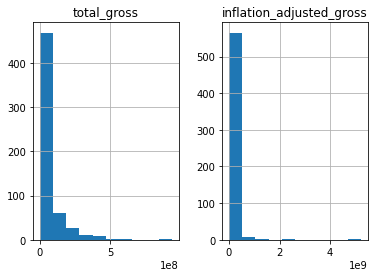

In [34]:
disney_movies.hist()

*Drawing a graphical histogram of the numerical info from above to make better sense of the data. Primarily, the data is right skewed and we can also see our outlier(s) as well, past numbers 4 and 5 on the x axis in both graphs with the small blue mini rectangle.*

# Transitioning to Data Cleaning 

#### Here, refer back to above, we saw this set has a total of 579 rows. We are checking below now for non - null values with the .info() method.
Null Values : Missing value. It's a value that appears blank
Non -Null values: Data that isn't missing. It is data that is filled in.(The opposite of null values)

In [31]:
disney_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


*This visual shows non-null values in that the genre column has only a count of 562 non - null values(579–562=17 null values) and mpaa_rating has 523 non- null values(56 null values). They do not equal 579 which is our original row total. This shows clearly missing data.*

##  Idenifying Missing Data:
* Drawing a True or False Table to see which columns has missing values by counting in the dataframe.

In [32]:
disney_movies.isnull()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
574,False,False,False,False,False,False
575,False,False,False,False,False,False
576,False,False,False,False,False,False
577,False,False,False,False,False,False


* This didn't draw a clear picture of the total number of missing values. Below, let's count them directly

## Final Count of Missing Values

In [33]:
disney_movies.isnull().sum() #counting the direct number of missing values in row

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

* Notes - This maps out and confirms the exact columns( "genre" and "mpaa_rating") we picked out earlier. Remember above when using disney_movies.info(), we saw genre had 17 null values and 56 null values for mpaa_rating.

## Outlier Check for income over 5 billion

* If you refer back to our boxplot, 5 is the highest number on the boxplot. 5 represents on that boxplot \\$5B. Anything over that represents an outlier. That's what we are going to be checking for below.
* This will be applied to each numerical column.(We did most of this back in our boxplot. Let's make sure there are no more hidden outliers we didn't catch beyond $5B)

Outlier check for *total_gross*  column for over \\$5B:

In [34]:
disney_movies[disney_movies.total_gross>5000000000]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross


This confirms that there isn't any movies over \\$5B for the total_gross column.

Outlier check for inflation_adjusted_gross for over \\$5B:

In [35]:
disney_movies[disney_movies.inflation_adjusted_gross>5000000000]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,12/21/1937,Musical,G,184925485,5228953251


* Snow White and the Seven Dwarfs still Dominates! This was an extra check since on our max value at ROW 0 is the movie above: Snow White and the Seven Dwarfs and I decided to keep this outlier (with the explanation in that above paragraph.)

### Checking and removing columns that are  90% empty - if any 

* Dropping columns that are 90% empty because you can't do analysis with them.

In [37]:
threshold = len(disney_movies)*0.1     #10% (my rows =57.9) #splittling data 90 and 10%
threshold

57.900000000000006

In [38]:
disney_movies.dropna(thresh=threshold, axis=1, inplace=True) #setting the axis to 1 because we are dropping columns 

In [39]:
print(disney_movies.isnull().sum())

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64


In [40]:
disney_movies.shape #the shape remains the same because no columns have 10% of data missing

(579, 6)

#### Explanation of above threshold:

*I set a threshold of the length of disney_movies dataset which is 579 and multiplying it by 1 (0.1). So 0.1 means 
we are taking 10% of the total row count of 579. It returns 57.9 . This is 10% of our row count. We are now dropping columns with values less than 10% threshold.*

*We saw no columns had less than 10% after using is.null().sum() function. This result was the same count when we used it above so we will move on now.* 

###  Data Imputation and Manipulation

#### Filling in missing null values using aggregate functions such as mean, median, mode. 

*We saw from our summary statistics the columns with the missing values are in columns genre and mpaa_rating. These columns are both string data, not numerical. As a result, we will be filling the missing values with the mode of the data. (If the columns were numerical that were missing, we would fill in the missing values with median since our data is right skewed).*




### Fill in the missing categorical values with mode

In [41]:
# Checking what the mode values are for these columns modes. Be sure there not bimodal. 

print(disney_movies['genre'].mode())
print(disney_movies['mpaa_rating'].mode())

0    Comedy
dtype: object
0    PG
dtype: object


*The results above are fortunately unimodal value for each*

In [43]:
# Filling now those missing catergorical data values with mode using fillna with a string value 

disney_movies['genre'].fillna(str(disney_movies['genre'].mode().values[0]), inplace = True)
disney_movies['mpaa_rating'].fillna(str(disney_movies['genre'].mode().values[0]), inplace = True)

In [74]:
#Now because we filled the null values above, count the missing values below now to ensure they are filled.
disney_movies.isnull().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

#### You can clearly see that the missing nulls are all taken care of :)

## Data Visualization

* Now below I am grouping the data based on the Disney Movie *'genre'.* 

In [93]:
#grouping all the movies into containers of their genre and storing them away in a variable called grp
grp = disney_movies.groupby('genre')
x = grp['total_gross'].agg(np.sum) #extracting the total_gross column and aggregating to see how much was made by catergorgy 
y =grp['inflation_adjusted_gross'].agg(np.sum) # extracting inflation adjusted gross column to see how much income was made by genre
 

print(x)
print(y)


genre
Action                  4184563282
Adventure              16389069453
Black Comedy              97543212
Comedy                  8237666691
Concert/Performance      103456466
Documentary              180685619
Drama                   4106972970
Horror                    87068872
Musical                 1157284155
Romantic Comedy         1152206855
Thriller/Suspense       1406806519
Western                  359011459
Name: total_gross, dtype: int64
genre
Action                  5498936786
Adventure              24561266158
Black Comedy             156730475
Comedy                 15777130297
Concert/Performance      114821678
Documentary              203488418
Drama                   8195804484
Horror                   140483092
Musical                 9657565776
Romantic Comedy         1788872933
Thriller/Suspense       2151690954
Western                  516709946
Name: inflation_adjusted_gross, dtype: int64


Created x and y variable(s) of both numerical columns and used sum to find the total income for each genre in both total_gross and inflation_adjusted_gross.

* By using sum, it will show per genre how much income the movies made total. We can clearly see the Adventure genre made the most income for both income numerical columns.

 ## Creating the X Visualization from above
 #### See these statistics above perfectly in graphical representations!

Creating a straightforward simple visualization in matplotlib of these below to easily understand the total sum income for each genre for x variable total_gross.

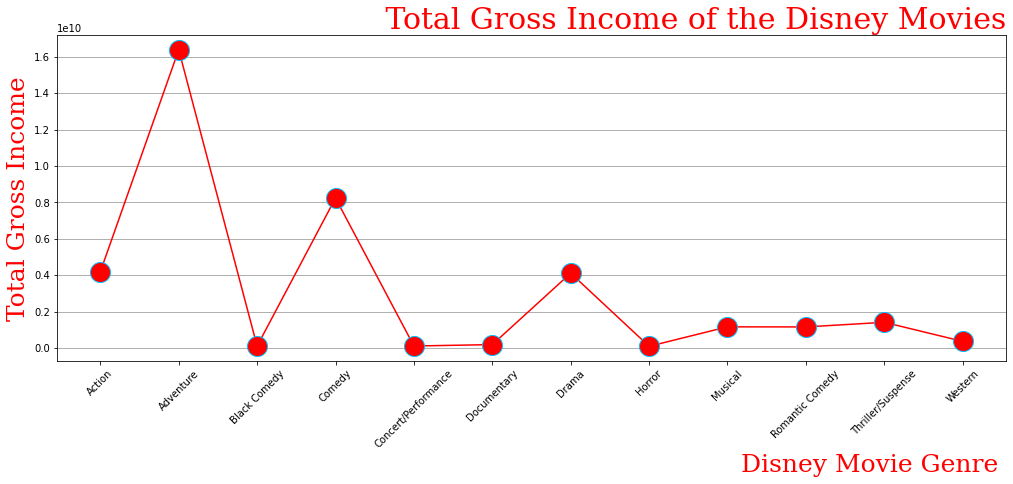

In [46]:
plt.figure(figsize=(17,6))
plt.plot(x,marker ='o',color ='Red', ms =20, mec ='DeepSkyBlue')

font1 = {'family':'serif','color':'Red','size':25}
font2 = {'family':'serif','color':'Red','size':25}
font3 = {'family':'serif','color':'#FF0000', 'size':30}
         
plt.xticks(rotation =45)




plt.xlabel(' Disney Movie Genre ', fontdict = font2, loc ='right')
plt.ylabel('Total Gross Income', fontdict= font1)
plt.title(' Total Gross Income of the Disney Movies', loc ='right',fontdict = font3)
plt.grid(axis ='y',linewidth = 1)

plt.show()

## Now to create a Y Visualization 

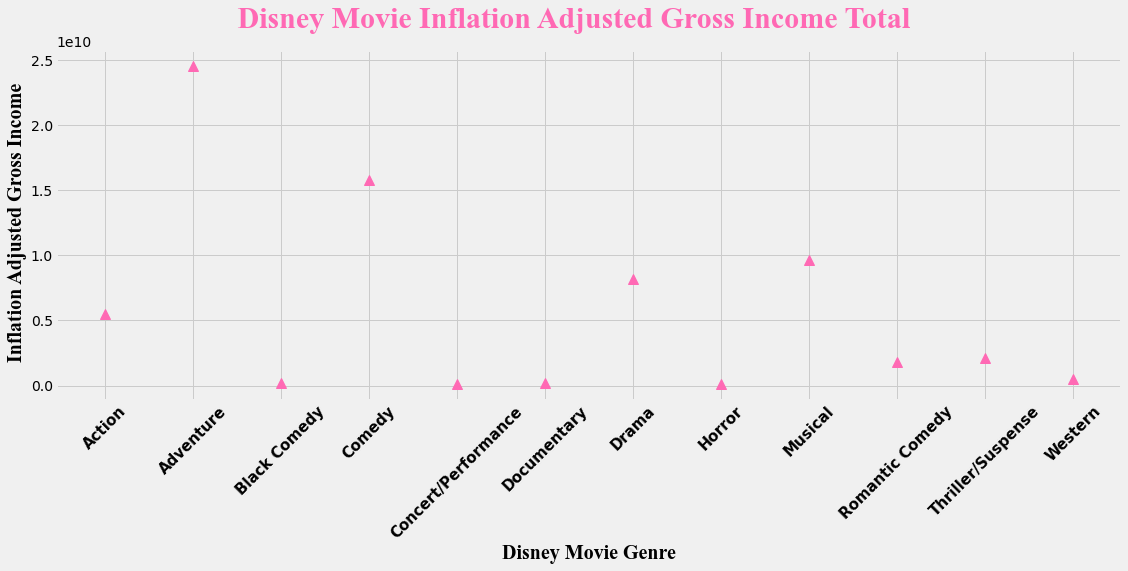

In [48]:
plt.figure(figsize=(17,6))
plt.plot(y,'^',color ='hotpink',markersize =10)
plt.xticks(rotation =45, fontsize=15,fontweight ='bold')
plt.xlabel(' Disney Movie Genre ', fontsize=20, fontweight ='bold',fontname="Times New Roman")
plt.ylabel(' Inflation Adjusted Gross Income', fontsize =20, fontname="Times New Roman", fontweight ='bold')
plt.suptitle(' Disney Movie Inflation Adjusted Gross Income Total',fontname="Times New Roman", fontweight="bold", color ='hotpink', fontsize=30)
plt.grid()

#using the style 
plt.style.use('fivethirtyeight')


plt.grid()

plt.show()



* How to read this graph: Look at 0.5 on the y axis and see le10 at the top, that means 0.5 is translated to $5B. Heads up on to better understand the graph*

*Inflation Adjusted Income Definition: "the purpose of the inflation-adjusted return metric is to reveal the return on an investment after removing the effects of inflation.*

* Also known as the real return, the inflation-adjusted return provides a more realistic comparison of an investment's performance". Adam Hayes, 29, May 2021, Inflation-Adjusted Return Definition (investopedia.com)*

### Findings/ Observations/ Notes: 

#### The  Highest Income Genre : Adventure 

##### Adventure Genre
Adventure for the win! After looking at both graphs, Adventure has the greatest income for both numerical columns as confirmed prior. Within the inflation adjusted gross income, it hits almost the at \\$25B . That's incredible! This also can be confirmed in our group stats picture right above the first visual graph. We can see that highest number total income for this genre is presented in our inflation adjusted gross column at $24,561,266,158. (*In example theory* When proceeding to create your presentation to Disney stakeholders, tell them how you came to this finding and your recommendations to keep producing this genre as it's their highest income source in movies.)

 

#### Unpacking the relationship between total gross income vs. inflation adjusted gross income: 

#### Each Disney Genres Observations/Brainstorming Notes

1.)  Action: We can visually see from the original total_gross graph markers there is a slight increase in income in the inflation adjusted gross income total. This is confirmed in our graph \\$4,184,563,282 → \\$5,498,936,786.

2.)) Adventure: Adventure is #1 recommendation to Disney to keep producing this product: Both graphs showcase markers at the highest height of the graph with a total gross of \\$16,389,069,453 and climbs in our second column to \\$24,561,266,158.
3.) Black Comedy appears to one of the genres that have the lower amount of income produced. We can see the relationship in our first and second graph look very similar at the 0.0 marker, (under \\$200M). The direct comparisons numbers of the total gross is \\$97,543,212 and after adjusted inflation gross income rises to \\$156,730,475.

* With the first 3 genres we can observe the relationship of both incomes that there is a rise in income after inflation adjusted gross income is accounted for. *

4.) Comedy: Comedy is the second highest genre income in both graphs. This genre is one of the most profitable and this would definitely be a product to present to stakeholders to keep and expand their production in development growth. It has an increase in our inflation adjusted gross with a total income of \\$15,777,130,297!

5.) Concert Performance:The graphs show clearly that this genre produced one of the lowest incomes at the 0.0 marker under \\$200M. The exact totals are Total Gross: \\$103,456,466.

Adjusted Gross Inflation: \\$114,821,678. Example how to present stakeholders  - "This a genre that still holds value because it shows that even though it has generated lower income significantly less than some others, stakeholders can choose to invest in performance improvement for the Concert/Performance category or remove the product altogether".

6.) Documentary:Documentary genre appears in both graphs to be at 0.0 marker under \\$200M in income. This genre has one of the lowest incomes produced. Total Gross- \\$180,685,619 and Inflation Adjusted Gross \\$203,488,418 (*Example Thought Process*| When presenting to stakeholders, showcase how there is opportunity for improvement their product with this specific genre).

7.) Drama: Drama shows in the total_gross x graph that it is the third highest genre in income at a little over the \\$4B mark at \\$4,106,972,970 in total gross. We see a direct increase over \\$8B marker at \\$8,195,804,484 in the y graph.

8.) Horror: This genre is our lowest income in total gross at \\$87,068,872. This shows on both graph markers. It increases a tad  after inflation in our second graph at \\$140,483,092. This income amount is right above our Concert/Performance genre after inflation.

9.) Musical: Now, this genre is interesting. It clearly shows in our first graph that it points towards more of our lower income genres, as it's in between 0.0–0.2 marker. However, in the second graph, it is the third highest income genre at almost the $1B after calculations inflation adjusted gross income. This is confirmed in our stats picture above and our findings that the relationship in income for Disney movies increases significantly in inflation.

10.) Romantic Comedy: Romantic comedy is shown on both graphs to appear to be lower to lower(mid) around \\$1B in terms of income and increased after inflation was calculated in our second graph at \\$1,788,872,933. 

11.) Thriller and Suspense: Thriller & Suspense hits above the \\$1B mark on both graphs. The x graph we see in the original total gross calculated \\$1,406,806,519 and jumps to over \\$2B in inflation is calculated \\$2,151,690,954 in the y graph.

12.)Western: Western sits above the 0.0 marker in both graphs for the total gross \\$359,011,459 → shifts to increase in adjusted gross income \\$516,709,946. Western is discovered to be Disney's lowest income genre out of all the genres.


#### Questions Answered- Pulling the Assets out of the data : 

Based on observations/thoughts/notes it's important to pull the gemstones  and the assets out of the dataset so you can show stakeholders what products in the business produces the most in income and also what doesn't. In the case the product produces the lowest income, you can suggest that the product can be invested in for improvement or be dropped.

Based off Observations,

* What are some Genre (s) had the lowest income?  
      
    Answer   Answer: TOP 3 GENRES for x graph | total_gross
    
     1.) *Horror* at the lowest total gross income
     2.) *Black Comedy* had the second lowest total gross income 
     3.) *Concert/Performance* had the third lowest total gross income

#### We see these numbers shift and reorder the the top 3 lowest income movie genres with inflation adjusted gross rising the income levels.
 
ANS: TOP 3 for our y graph | Total Gross of Inflation Adjusted Gross

  1.) *Concert/Performance is our lowest income genre 
  2.) *Horror is second lowest income genre
  3.) *Black/Comedy is our third lowest income genre after inflation adjusted gross.
  
  Comments: We see these genres shift in order rising income levels in inflation adjusted gross in the y graph.

#### * What Genre(s) had the highest income?

 Answer for our x graph| total_gross 
TOP 3
    
1.) Adventure is the top genre with the most total gross
2.)  Comedy is the Second 
3.) Action is the third genre with the most total gross

Answer for y graph| Total Inflation Adjusted Gross by Genre
 1.) *Adventure*  comes in first 
 2.) *Comedy* comes in second most profitable
 3.) *Musical* comes in third 



##### * What Genre(s) fell in the median range (in terms of income)? 

Ans: Some Included, Drama in both,  Action (After inflation adjustments were calculated), Thriller and Suspense (inflation adjusted gross)

#### Adventure and the Comedy Genre are the Top 2 most profitable! Great example on pulling the gold or the asset out of the data for stakeholders to show which product is most lucrative. Based off of these answers above…Let's take it a step further and ask more questions about what are the specific movie titles that contributed to these findings

Overview of Movie Title Questions below that we will be exploring in SQLite→

* 1.) Given Concert/Perfomance is the genre with the lowest income (in inflation adjusted gross), what are the movie titles in *Concert/Performance* with the lowest income in inflation adjusted gross that contributed to this finding?

     Sub Question: * Given Horror is the genre with the lowest income(in total_gross), what are movie titles in *Horror* contributed to this finding?
     
* 2.) What are movie titles that are producing the lowest amounts of income overall in both total gross and inflation adjusted gross income columns ?

* 3.) What are some of the top Disney Movie titles that has the highest inflation adjusted gross income regardless of genre?
     * What are the most profitable movie title's without the inflation adjusted gross income in just plainly total_gross?

* 4.) Given Adventure is our top Genre, What are the Disney Movies in the Adventure Genre that were the most profitable?

* 5.)Given Comedy is the second top genre, What are the Disney Movies in the Adventure Genre that were the most profitable?

*Using combo SQLlite and python filtering below in further analysis to answer these questions*

1.) Given Concert/Performance is the genre with the lowest income (in inflation adjusted gross), what are the movie titles in Concert/Performance with the lowest income in inflation adjusted gross that contributed to this finding?

In [35]:
#creating a dataframe 
disneysql = pd.read_csv("C:\\Users\\Alexandria\\Downloads\\disney\\disney_movies.csv")

#We will use sqlite3 library and create a connection.



In [36]:
conn = sqlite3.connect("Disney.db")

In [38]:

disneysql.to_sql('Disney_Movies_3', conn)


In [39]:

%load_ext sql
%sql sqlite:///Disney.db

In [40]:
%%sql

SELECT * 
FROM Disney_Movies_Data
WHERE "genre" = 'Concert/Performance' AND "inflation_adjusted_gross" <= 300000000
ORDER BY 6 ASC;

 * sqlite:///Disney.db
Done.


index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
478,Jonas Brothers: The 3D Concert Experiâ€¦,2/27/2009,Concert/Performance,G,38174685,38174685
464,Hannah Montana/Miley Cyrus: Best of Bâ€¦,2/1/2008,Concert/Performance,G,65281781,76646993


Completing below minor cleaning to both movie title names in the above photo to remove special characters to the correct movie , (as mentioned emphasizes on data cleaning is beyond the scope of this project, independent projects available on data cleaning)

In [41]:
jns = disney_movies.replace('Jonas Brothers: The 3D Concert Experiâ€¦', 'Jonas Brothers: The 3D Concert Experience')
hmb =disney_movies.replace('Hannah Montana/Miley Cyrus: Best of Bâ€¦', 'Hannah Montana/Miley Cyrus: Best of Both Worlds Concert')
print(jns.loc[[478]])
print(hmb.loc[[464]])


                                   movie_title release_date  \
478  Jonas Brothers: The 3D Concert Experience    2/27/2009   

                   genre mpaa_rating  total_gross  inflation_adjusted_gross  
478  Concert/Performance           G     38174685                  38174685  
                                           movie_title release_date  \
464  Hannah Montana/Miley Cyrus: Best of Both World...     2/1/2008   

                   genre mpaa_rating  total_gross  inflation_adjusted_gross  
464  Concert/Performance           G     65281781                  76646993  


We can see these movie 2 titles that shape our answer. I set the filter to under $300M in gross to see out movies with the lowest gross income numbers.

*It's also great to see in a dataset what isn't producing massive income the assets that way you can communicate to stakeholders a product with an oppurntunity to improve the product and add value or to remove the product.*

 #### Sub Question* Given Horror is the genre with the lowest income(in total_gross), what are movie titles in *Horror* contributed to this finding?

(Even though the questions ask for specifically movie titles, I will be still Selecting with * instead of just "movie titles" in the SELECT statement to see the genre and the rest of data information for the following questions for the scope of this project and so that it's clear and congruent with the earlier findings for readers)

In [42]:
%%sql

SELECT * 
FROM Disney_Movies_Data
WHERE "genre" = 'Horror' AND "total_gross" <= 30000000
ORDER BY 6 ASC;

 * sqlite:///Disney.db
Done.


index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
131,Innocent Blood,9/25/1992,Horror,R,4877567,9907922
34,Something Wicked This Way Comes,4/29/1983,Horror,None,5656087,15136765
190,The Puppet Masters,10/21/1994,Horror,R,8579626,17727017
517,Fright Night,8/19/2011,Horror,R,18298649,19452402
436,Stay Alive,3/24/2006,Horror,PG-13,23086480,29712825
275,An American Werewolf in Paris,12/25/1997,Horror,R,26570463,48546161


*The Innocent Blood* is the movie title with the lowest income recorded in our map.  *Something Wicked This Way Comes* comes in second while *The Puppet Masters* take third lowest. This maps out 6 for the movie title's with the lowest income that contributed to the genre's income performance.Have you heard of these movies?

#### 2.)What are movie titles that are producing the lowest amounts of income overall in both total gross and inflation adjusted gross income columns ?

In [21]:
%%sql

SELECT *
FROM Disney_Movies AS dms
WHERE "total_gross" <= 1000000 AND "inflation_adjusted_gross" <=1000000
ORDER BY 6;

 * sqlite:///Disney.db
Done.


index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
20,The Many Adventures of Winnie the Pooh,3/11/1977,None,None,0,0
27,Amy,3/20/1981,Drama,None,0,0
29,Condorman,8/7/1981,Action,None,0,0
355,Frank McKlusky C.I.,1/1/2002,None,None,0,0
511,Zokkomon,4/22/2011,Adventure,PG,2815,2984
487,Walt and El Grupo,9/10/2009,Documentary,PG,20521,23064
251,The War at Home,11/20/1996,None,R,34368,65543
280,An Alan Smithee Film: Burn Hollywood â€¦,2/27/1998,Comedy,R,45779,82277
502,Gedo Senki (Tales from Earthsea),8/13/2010,Adventure,PG-13,48658,51988
185,It's Pat,8/26/1994,Comedy,None,60822,125666


* Filtering for income under \\$1M

*Minor cleaning to both movie title names, (as mentioned emphazies on  data cleaning is beyond the scope of this project, independent projects availble on data cleaning)*

In [59]:
ab1= disney_movies.replace('An Alan Smithee Film: Burn Hollywood â€¦','An Alan Smithee Film: Burn Hollywood Burn')

In [60]:
print(ab1.loc[[280]]) #checking to make sure correct name is replaced

                                   movie_title release_date   genre  \
280  An Alan Smithee Film: Burn Hollywood Burn    2/27/1998  Comedy   

    mpaa_rating  total_gross  inflation_adjusted_gross  
280           R        45779                     82277  


We can clearly see Zokkomon, Walt El Grupo, War at Home have the lowest gross income.  

*Note the first 3 movies in this result have zero for total gross and inflation adjusted gross, as well as in the rating column data showing none. They are filled in that's why they didn't show up in the missing values earlier. Since there is no data to perform analysis on, we could choose to drop these. Index 280 movie name is corrected*

#### 3.)  What are  Disney Movie titles that have the highest inflation adjusted gross regardless of genre?
  
   Sub Question: * What are the most profitable movie title's without the inflation adjusted gross income in just plainly total_gross?

In [61]:
disney_movies[disney_movies.inflation_adjusted_gross>1000000000]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,12/21/1937,Musical,G,184925485,5228953251
1,Pinocchio,2/9/1940,Adventure,G,84300000,2188229052
2,Fantasia,11/13/1940,Musical,G,83320000,2187090808
3,Song of the South,11/12/1946,Adventure,G,65000000,1078510579
6,Lady and the Tramp,6/22/1955,Drama,G,93600000,1236035515
8,101 Dalmatians,1/25/1961,Comedy,G,153000000,1362870985


#### Snow White and the Seven Dwarfs: Musical Genre is the movie with the highest inflation adjusted gross income


* This was also confirmed in our earlier finding for outliers.


*Not only Snow White, some of these discoveries include  Pinocchio, Lady and Tramp. 
You can clearly see the complete  6 movies above that fufill this criteria.*



#### Sub Question: What are the most profitable movie title's without the inflation adjusted gross income in just plainly total_gross?

In [67]:
%%sql

SELECT * 
FROM Disney_movies dms
WHERE "total_gross" >= 500000000
ORDER BY 6 ASC;

 * sqlite:///Disney.db
Done.


index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
578,Rogue One: A Star Wars Story,12/16/2016,Adventure,PG-13,529483936,529483936
524,The Avengers,5/4/2012,Action,PG-13,623279547,660081224
564,Star Wars Ep. VII: The Force Awakens,12/18/2015,Adventure,PG-13,936662225,936662225


We can clearly see that *Star Wars Ep. VII: The Force Awakens* steals the win in total gross income with highest numbers, coming with *The Avengers* in second, and *Rogue One: A Star Wars Story* takes third.

* #### 4.) Given Adventure is our top Genre, What are the Disney Movies in the Adventure Genre that were the most profitable?

In [91]:
%%sql

SELECT * 
FROM Disney_Movies as dms
WHERE "genre" = 'Adventure' AND "inflation_adjusted_gross" >= 500000000 
ORDER BY 6 DESC;

 * sqlite:///Disney.db
Done.


index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,12/18/2015,Adventure,PG-13,936662225,936662225
578,Rogue One: A Star Wars Story,12/16/2016,Adventure,PG-13,529483936,529483936
441,Pirates of the Caribbean: Dead Manâ€™â€¦,7/7/2006,Adventure,PG-13,423315812,544817142
179,The Lion King,6/15/1994,Adventure,G,422780140,761640898
384,Finding Nemo,5/30/2003,Adventure,G,380529370,518148559
1,Pinocchio,2/9/1940,Adventure,G,84300000,2188229052
3,Song of the South,11/12/1946,Adventure,G,65000000,1078510579
5,"20,000 Leagues Under the Sea",12/23/1954,Adventure,None,28200000,528279994


 *We can see index 441 Pirates of the Carribbean: Dead Man's Chest needs some additional cleaning to it's name. Let's Rename this the correct name (This project is meant for it's main focus to be a simple exploratory analysis, deep data cleaning will be presented in another project and is beyond the scope of the main focus on what will be completed.*

In [69]:
ab2 = disney_movies.replace('Pirates of the Caribbean: Dead Manâ€™â€¦', 'Pirates of the Caribbean: Dead Man\'s Chest')


In [92]:
print(ab2.loc[[441]])

                                    movie_title release_date      genre  \
441  Pirates of the Caribbean: Dead Man's Chest     7/7/2006  Adventure   

    mpaa_rating  total_gross  inflation_adjusted_gross  
441       PG-13    423315812                 544817142  


##### This showcases the top 8 movies  Inflation Gross Income with the most income:

Star Wars VII for the Win, Rogue One: A Star Wars Story which match our prior above Question. The Adventure genre strikes gold and gems in the  Pirates of the Carribbean Dead Man's Chest, The Lion King and Finding Nemo. 

#### 5.) Given Comedy is our second top Genre, What are the Disney Movies that were the most profitable in inflation adjusted gross?

In [71]:
%%sql

SELECT * 
FROM Disney_Movies
WHERE "genre" = 'Comedy' AND "inflation_adjusted_gross" >= 500000000 
ORDER BY 6 DESC;

 * sqlite:///Disney.db
Done.


index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
8,101 Dalmatians,1/25/1961,Comedy,G,153000000,1362870985


#### 101 Dalmations for the Win in Comedy as the most lucrative movie in inflation_adjusted_gross.